In [3]:
from pygazeanalyser.edfreader import read_edf
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
def plot_eyeeees(datafile,starttime,plot_all=False):
    data = read_edf(datafile,starttime) # Read data in
    msgs = data[1]['events']['msg'] 
    action_recorded_time = []
    for msg in msgs:
        if 'ACTION RECORDED' in msg[1]:
            action_recorded_time.append(msg)
            
    #print(len(action_recorded_time))
    tracker_time = data[1]['trackertime']
    pupil_size = data[1]['size']
    trials = []
    for msg in action_recorded_time:
        start = msg[0]-2000
        end = msg[0]+1000

        ix = np.where((tracker_time >= start) & (tracker_time <= end))[0]
        if len(ix) != 1500:
            trials.append(pupil_size[ix][:1500])
        else:
            trials.append(pupil_size[ix])
    
    
    non_zero_trials = []
    for i in range(len(trials)):
        if 0 not in trials[i]:
            non_zero_trials.append(trials[i])
    
    mean_signal = np.mean(non_zero_trials, axis=0)
    
    plt.plot(mean_signal,lw=4)
    plt.title('Trials kept: ' +  str(len(non_zero_trials)) + ' Total Trials: ' + str(len(trials)))
    if plot_all == True:
        for i in range(len(non_zero_trials)):  
            plt.plot(non_zero_trials[i],alpha=0.1)
    return msgs

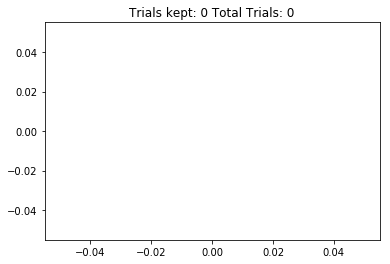

In [134]:
path = '../data/'
file = '88001.asc'
msgs001 = plot_eyeeees(path + file, '509173')

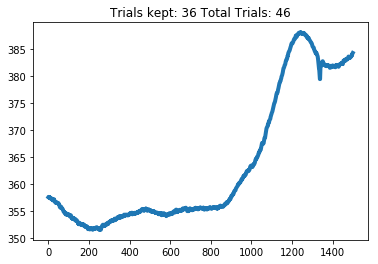

In [135]:
file = '88002.asc'
msgs002 = plot_eyeeees(path + file, '1883755')

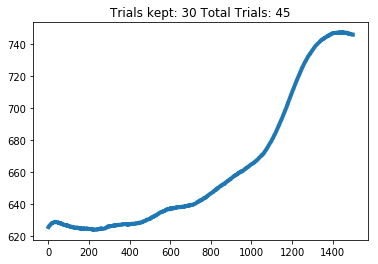

In [140]:
file = '88003.asc'
msg003 = plot_eyeeees(path+file, "753266")

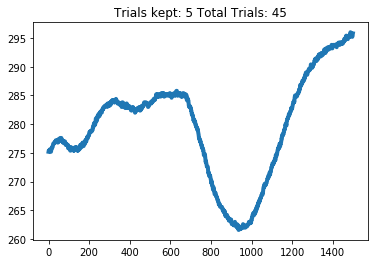

In [141]:
file = '88004.asc'
msg004 = plot_eyeeees(path+file, "5113412")

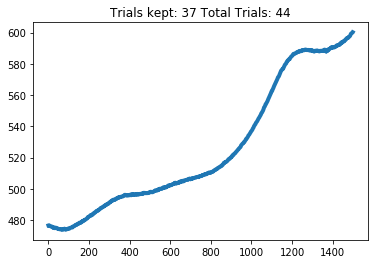

In [142]:
file = '88005.asc'
msg005 = plot_eyeeees(path+file, "559642")

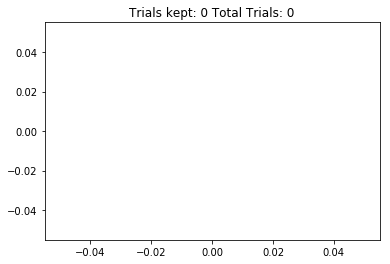

In [143]:
file = '88006.asc'
msg006 = plot_eyeeees(path+file, "1495340")

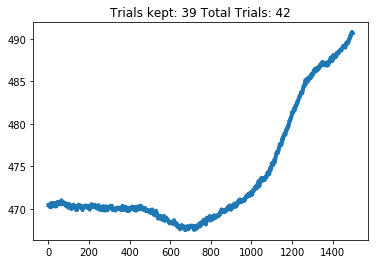

In [144]:
file = '88007.asc'
msg007 = plot_eyeeees(path+file, "4531630")

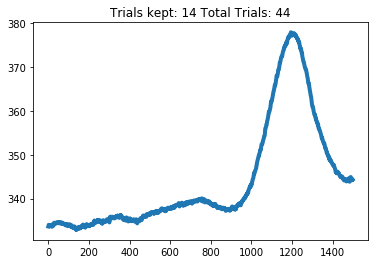

In [145]:
file = '88008.asc'
msg008 = plot_eyeeees(path+file, "263665")

[[2162375, '!MODE RECORD CR 500 2 1 LR\n']]

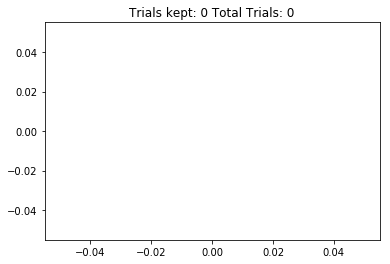

In [146]:
file = '88009.asc'
plot_eyeeees(path+file, "2162375")

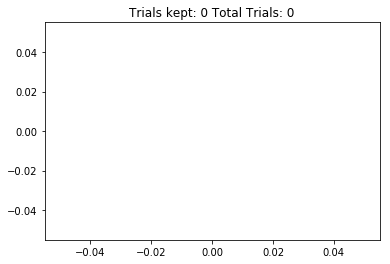

In [147]:
file = '88010.asc'
msg010 = plot_eyeeees(path+file, "131676")

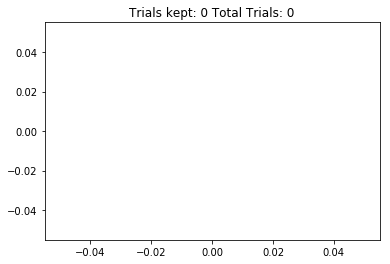

In [148]:
file = '88011.asc'
msg011 = plot_eyeeees(path+file, "3271262")